Mounting Google Drive and installing the Mit-Bih Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive
!unzip mit-bih.zip -d /content/drive/MyDrive/mit-bih-dataset

/content/drive/MyDrive
Archive:  mit-bih.zip
replace /content/drive/MyDrive/mit-bih-dataset/mitbih_database/100.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!pip install np_utils

  Using cached np_utils-0.6.0.tar.gz (61 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=dfbc605a850f397f93ae42c38d7a7409c94ec5448023f3c015a85b27da94c72c
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import csv
import itertools
import collections

import pywt
from scipy import stats

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import keras
from keras.models import Sequential
from keras.layers import Conv1D, AvgPool1D, Flatten, Dense, Dropout, Softmax
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.utils import plot_model
from keras import regularizers


%matplotlib inline

In [ ]:
plt.rcParams["figure.figsize"] = (30,6)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'b'
plt.rcParams['axes.grid'] = True

In [ ]:
path = '/content/drive/MyDrive/mit-bih-dataset/mitbih_database/'
window_size = 180
maximum_counting = 10000

classes = ['N', 'L', 'R', 'A', 'V']
n_classes = len(classes)
count_classes = [0]*n_classes

X = list()
y = list()

In [ ]:
filenames = next(os.walk(path))[2]

# Split and save .csv , .txt
records = list()
annotations = list()
filenames.sort()


In [ ]:
print(filenames)

['100.csv', '100annotations.txt', '101.csv', '101annotations.txt', '102.csv', '102annotations.txt', '103.csv', '103annotations.txt', '104.csv', '104annotations.txt', '105.csv', '105annotations.txt', '106.csv', '106annotations.txt', '107.csv', '107annotations.txt', '108.csv', '108annotations.txt', '109.csv', '109annotations.txt', '111.csv', '111annotations.txt', '112.csv', '112annotations.txt', '113.csv', '113annotations.txt', '114.csv', '114annotations.txt', '115.csv', '115annotations.txt', '116.csv', '116annotations.txt', '117.csv', '117annotations.txt', '118.csv', '118annotations.txt', '119.csv', '119annotations.txt', '121.csv', '121annotations.txt', '122.csv', '122annotations.txt', '123.csv', '123annotations.txt', '124.csv', '124annotations.txt', '200.csv', '200annotations.txt', '201.csv', '201annotations.txt', '202.csv', '202annotations.txt', '203.csv', '203annotations.txt', '205.csv', '205annotations.txt', '207.csv', '207annotations.txt', '208.csv', '208annotations.txt', '209.csv'

In [ ]:
for f in filenames:
    filename, file_extension = os.path.splitext(f)

    # *.csv
    if(file_extension == '.csv'):
        records.append(path + filename + file_extension)

    # *.txt
    else:
        annotations.append(path + filename + file_extension)

<>:35: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:43: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:51: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:78: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:35: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:43: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:51: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:78: SyntaxWarning: "is" with a literal. Did you mean "=="?


<ipython-input-44-ebccd5d8d551>:35: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if r is 1:
<ipython-input-44-ebccd5d8d551>:43: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if r is 1:
<ipython-input-44-ebccd5d8d551>:51: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if r is 1:
<ipython-input-44-ebccd5d8d551>:78: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if r is 1 and not example_beat_printed:


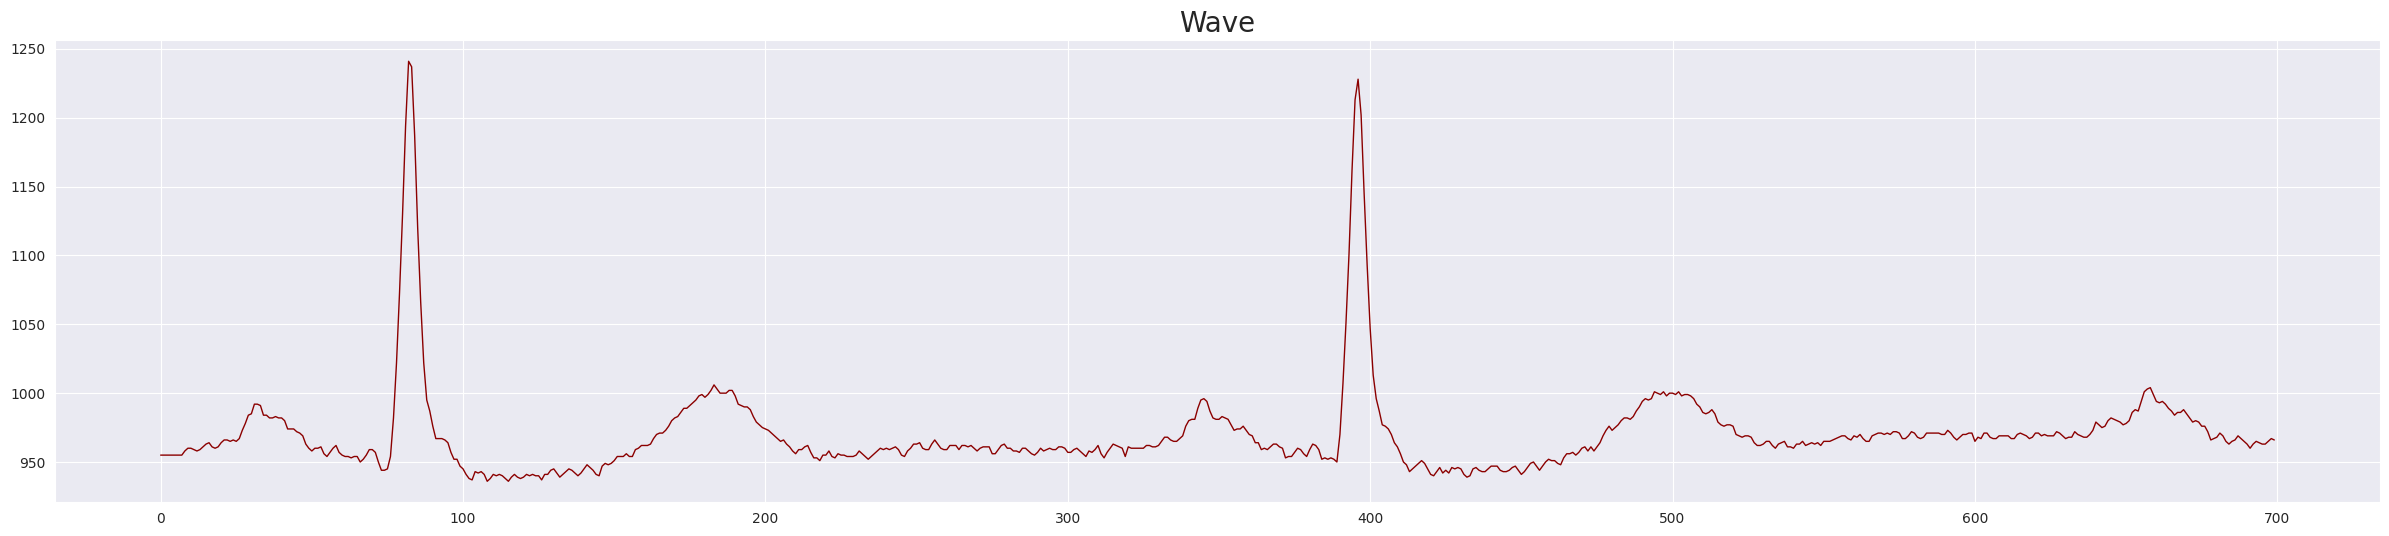

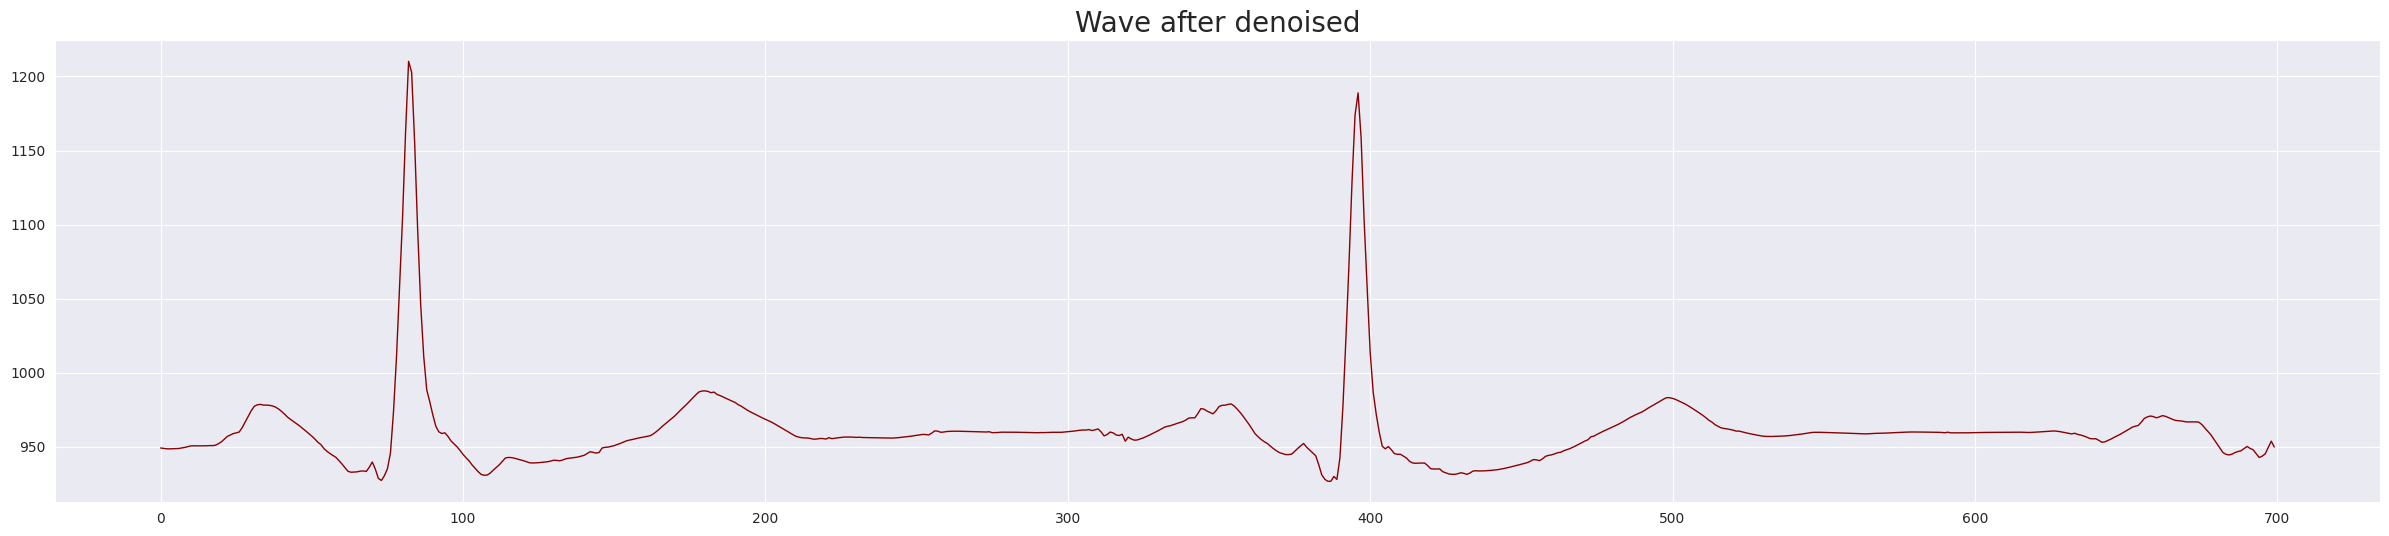

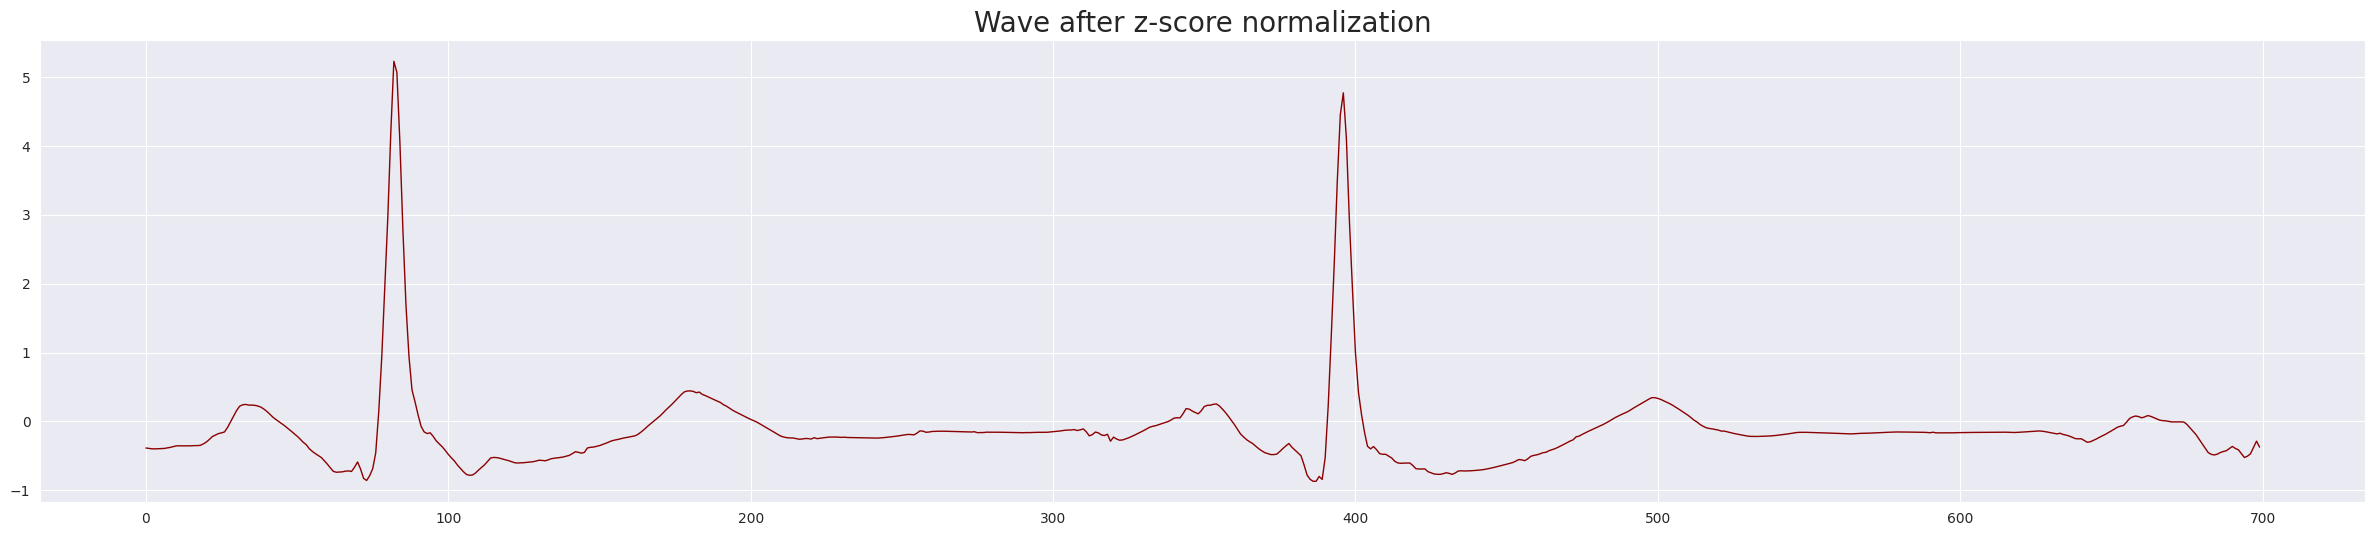

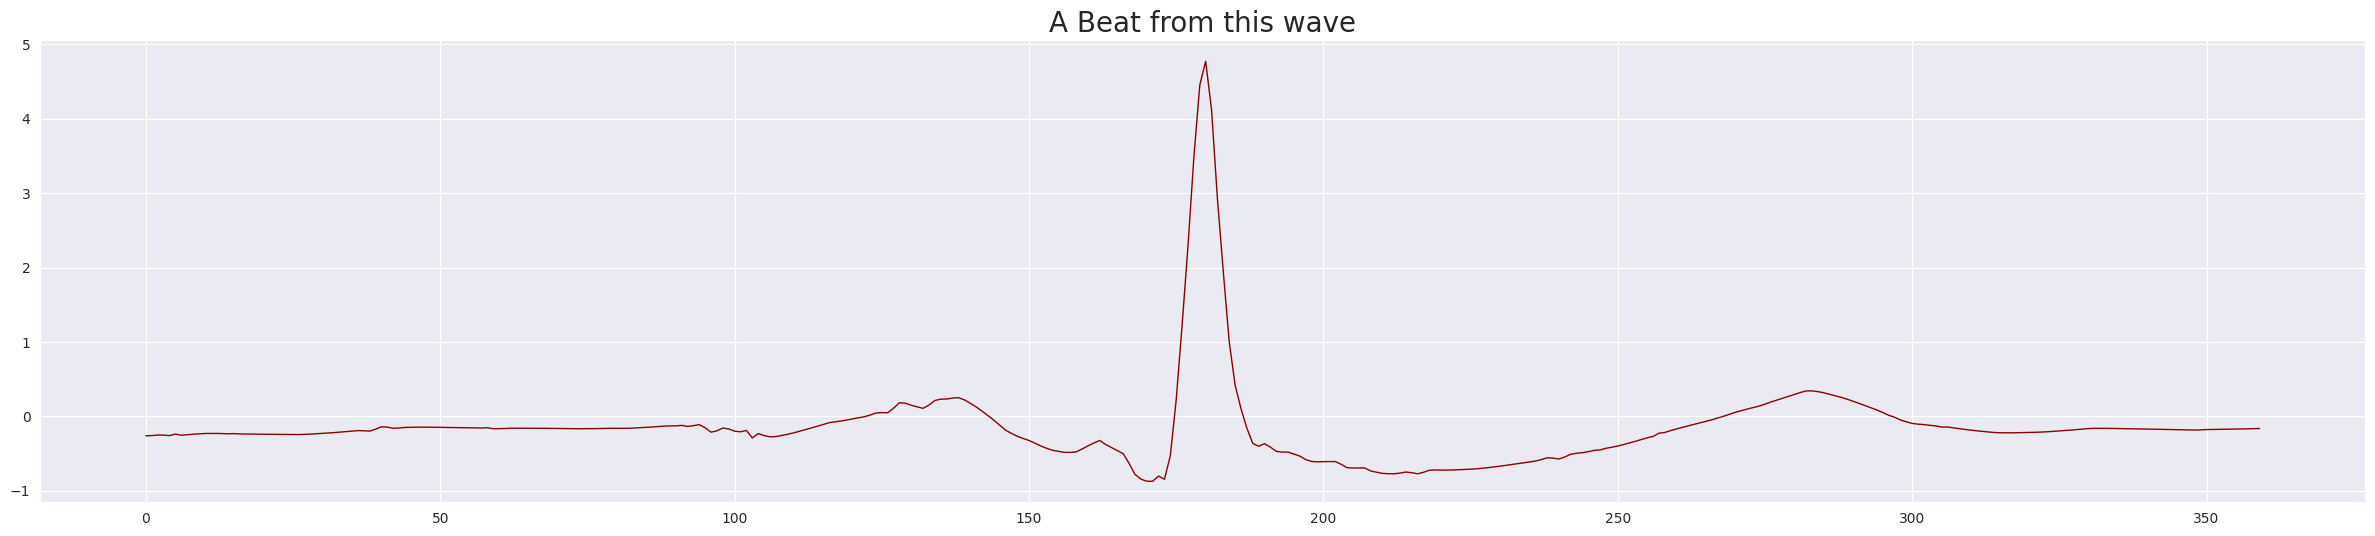

(100012, 360) (100012,)


In [ ]:
#Wavelet Transform Method
def denoise(data):
    w = pywt.Wavelet('sym4')
    maxlev = pywt.dwt_max_level(len(data), w.dec_len)
    threshold = 0.04 # Threshold for filtering

    coeffs = pywt.wavedec(data, 'sym4', level=maxlev)
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))

    datarec = pywt.waverec(coeffs, 'sym4')

    return datarec

!pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style('darkgrid')

for r in range(0,len(records)):
    signals = []

    with open(records[r], 'rt') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') # read CSV file
        row_index = -1
        for row in spamreader:
            if(row_index >= 0):
                signals.insert(row_index, int(row[1]))
            row_index += 1

    # Plot an example to the signals
    if r is 1:
        # Plot each patient's signal
        plt.title("Wave", fontsize=20)
        plt.plot(signals[0:700], color='darkred')
        plt.show()

    signals = denoise(signals)
    # Plot an example to the signals
    if r is 1:
        # Plot each patient's signal
        plt.title("Wave after denoised", fontsize=20)
        plt.plot(signals[0:700], color='darkred')
        plt.show()

    signals = stats.zscore(signals)
    # Plot an example to the signals
    if r is 1:
        # Plot each patient's signal
        plt.title("Wave after z-score normalization", fontsize=20)
        plt.plot(signals[0:700], color='darkred')
        plt.show()

    # Read anotations: R position and Arrhythmia class
    example_beat_printed = False
    with open(annotations[r], 'r') as fileID:
        data = fileID.readlines()
        beat = list()

        for d in range(1, len(data)): # 0 index is Chart Head
            splitted = data[d].split(' ')
            splitted = filter(None, splitted)
            next(splitted) # Time... Clipping
            pos = int(next(splitted)) # Sample ID
            arrhythmia_type = next(splitted) # Type
            if(arrhythmia_type in classes):
                arrhythmia_index = classes.index(arrhythmia_type)
#                 if count_classes[arrhythmia_index] > maximum_counting: # avoid overfitting
#                     pass
#                 else:
                count_classes[arrhythmia_index] += 1
                if(window_size <= pos and pos < (len(signals) - window_size)):
                    beat = signals[pos-window_size:pos+window_size]     # REPLACE WITH R-PEAK DETECTION
                    # Plot an example to a beat
                    if r is 1 and not example_beat_printed:
                        plt.title("A Beat from this wave", fontsize=20)
                        plt.plot(beat, color='darkred')
                        plt.show()
                        example_beat_printed = True

                    X.append(beat)
                    y.append(arrhythmia_index)

# data shape
print(np.shape(X), np.shape(y))

<>:31: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:39: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:47: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:74: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:31: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:39: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:47: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:74: SyntaxWarning: "is" with a literal. Did you mean "=="?


<ipython-input-15-c9a5ebe03f55>:31: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if r is 1:
<ipython-input-15-c9a5ebe03f55>:39: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if r is 1:
<ipython-input-15-c9a5ebe03f55>:47: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if r is 1:
<ipython-input-15-c9a5ebe03f55>:74: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if r is 1 and not example_beat_printed:


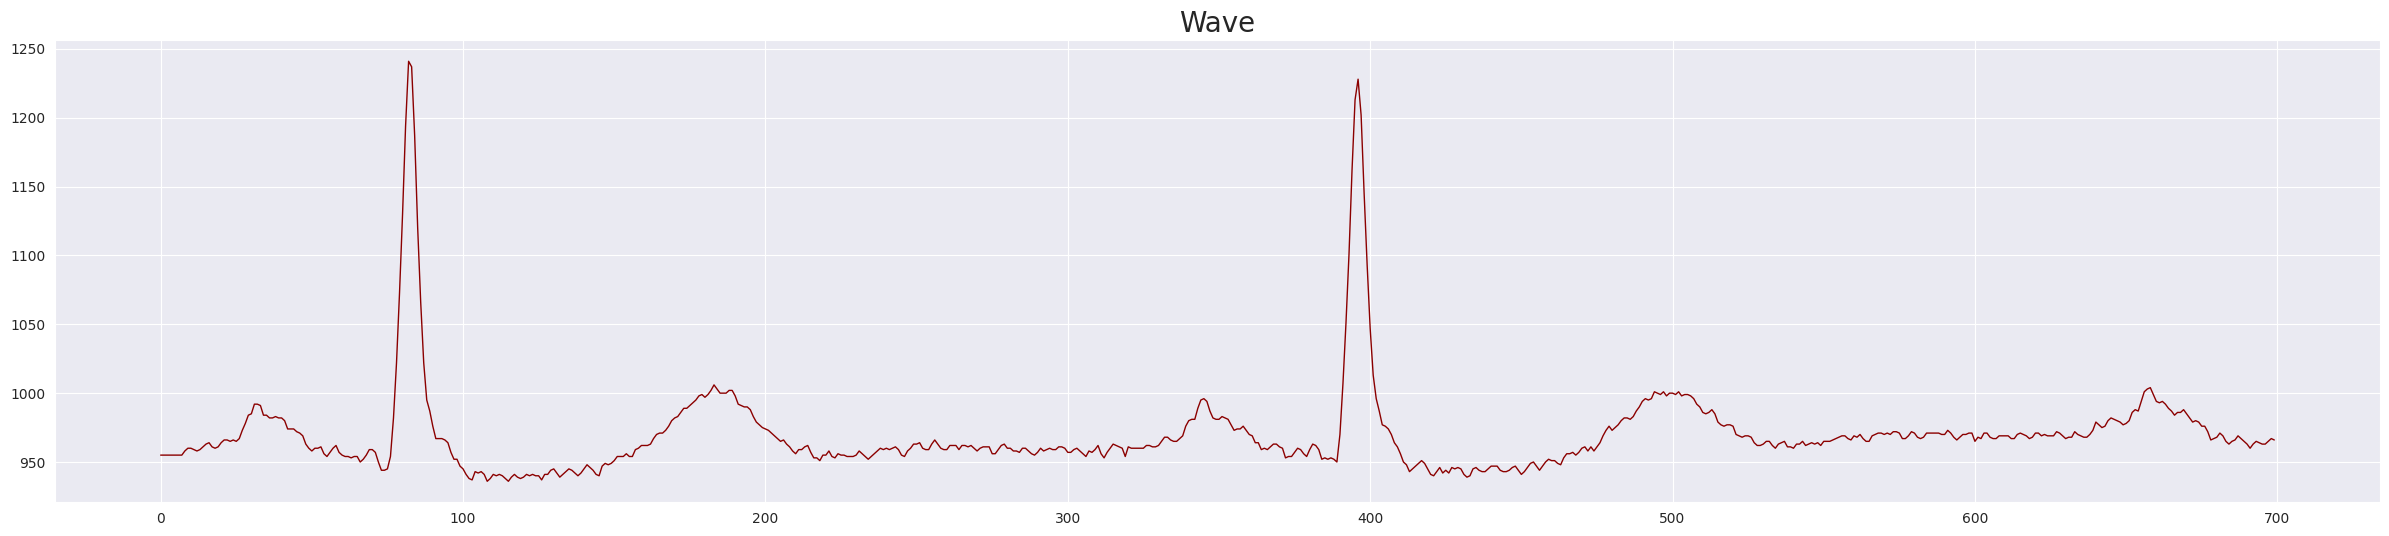

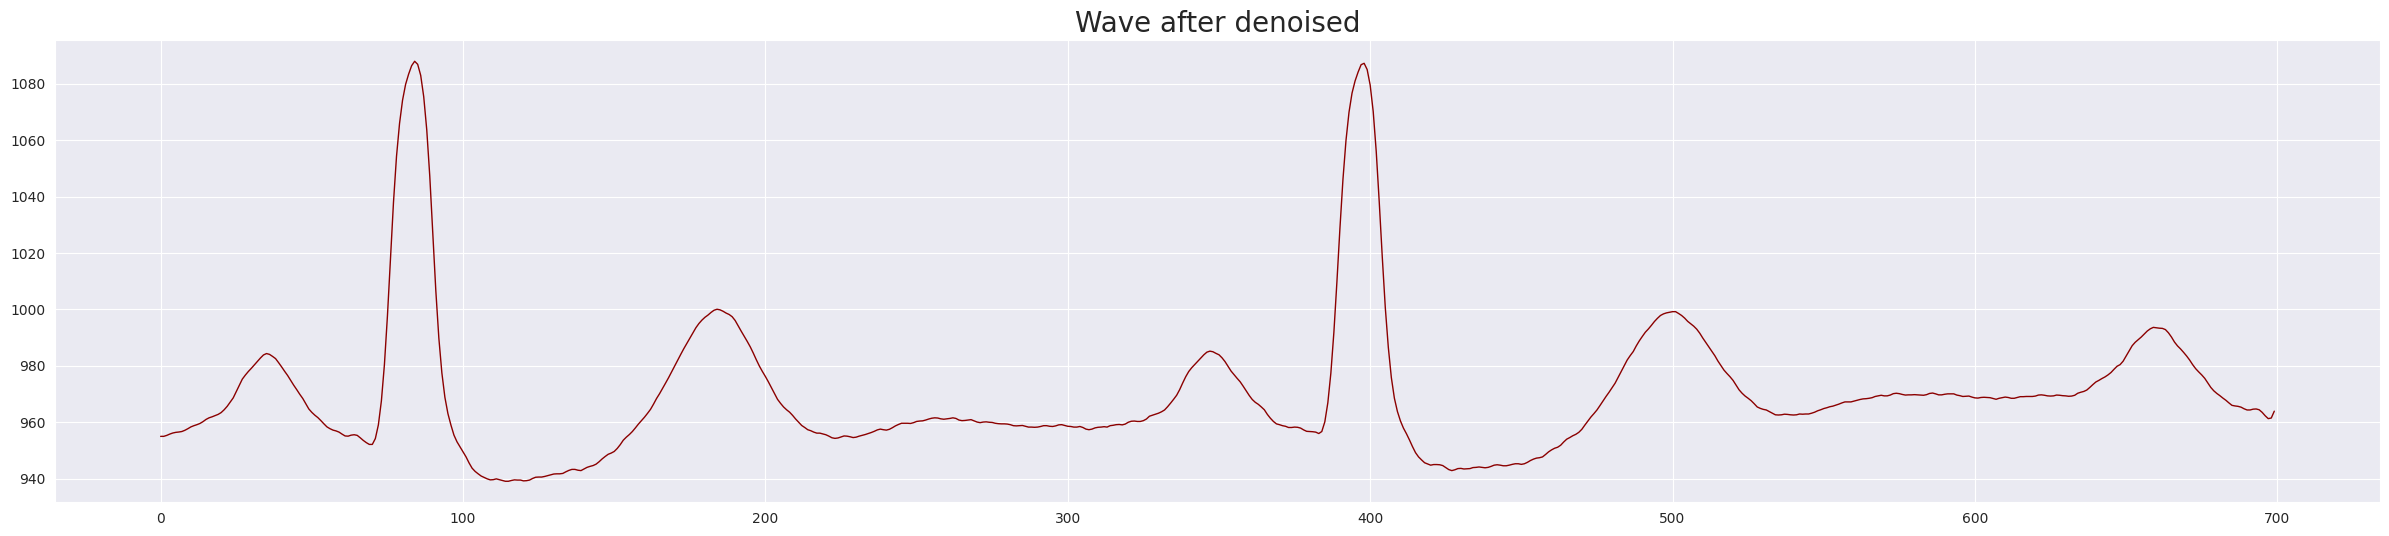

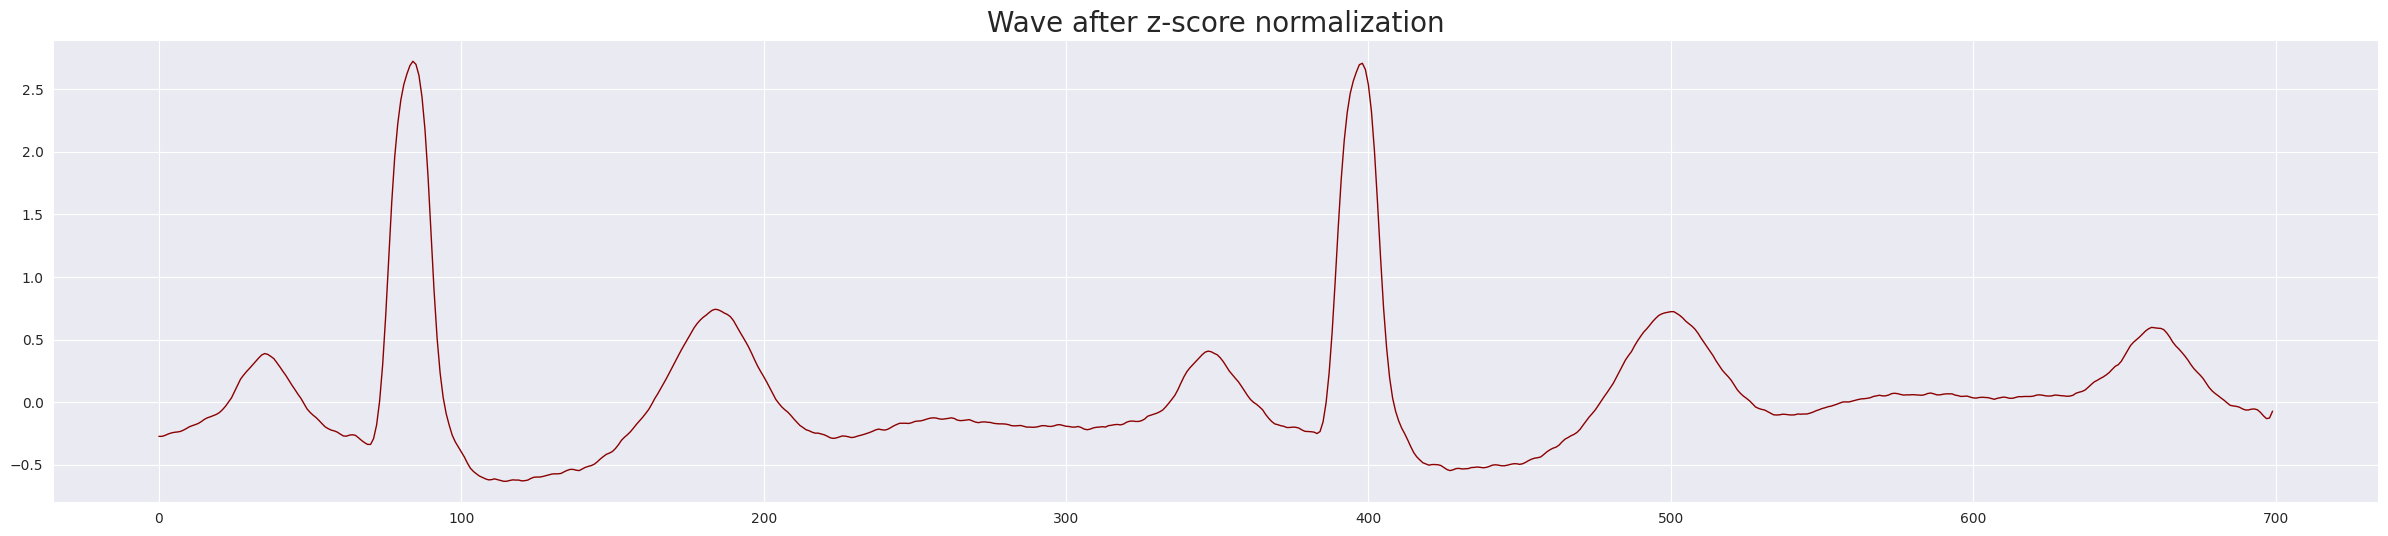

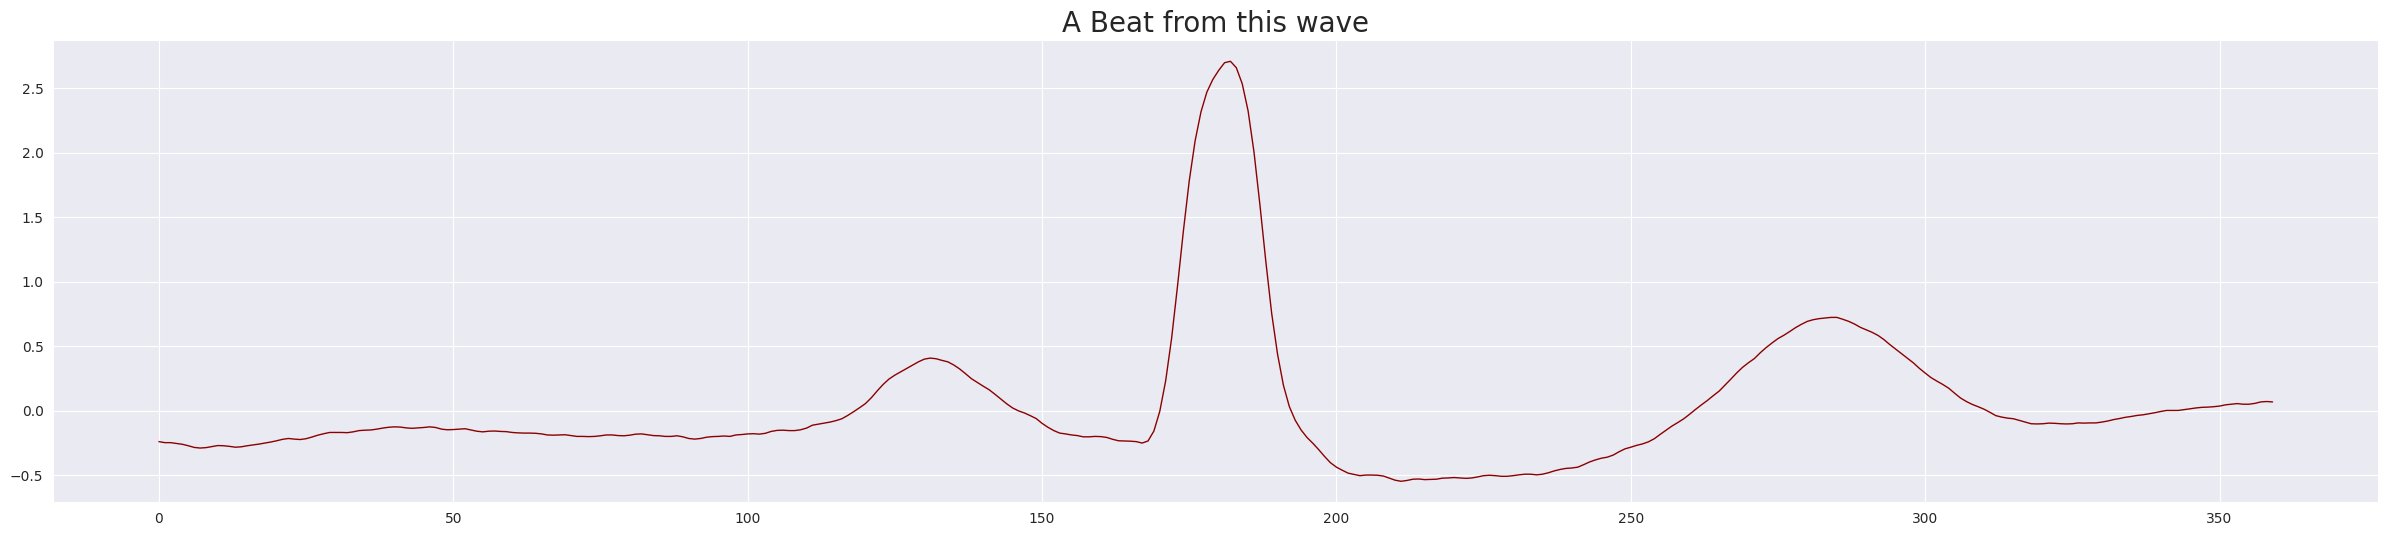

(447949, 360) (447949,)


In [ ]:
#Moving Average Method
def moving_average_denoise(data, window_size=14):
    # Apply moving average to smooth out noise
    denoised_signal = []
    for i in range(len(data)):
        start = max(0, i - window_size // 2)
        end = min(len(data), i + window_size // 2)
        denoised_signal.append(np.mean(data[start:end]))
    return np.array(denoised_signal)

!pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style('darkgrid')

for r in range(0,len(records)):
    signals = []

    with open(records[r], 'rt') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') # read CSV file
        row_index = -1
        for row in spamreader:
            if(row_index >= 0):
                signals.insert(row_index, int(row[1]))
            row_index += 1

    # Plot an example to the signals
    if r is 1:
        # Plot each patient's signal
        plt.title("Wave", fontsize=20)
        plt.plot(signals[0:700], color='darkred')
        plt.show()

    signals = moving_average_denoise(signals)
    # Plot an example to the signals
    if r is 1:
        # Plot each patient's signal
        plt.title("Wave after denoised", fontsize=20)
        plt.plot(signals[0:700], color='darkred')
        plt.show()

    signals = stats.zscore(signals)
    # Plot an example to the signals
    if r is 1:
        # Plot each patient's signal
        plt.title("Wave after z-score normalization", fontsize=20)
        plt.plot(signals[0:700], color='darkred')
        plt.show()

    # Read anotations: R position and Arrhythmia class
    example_beat_printed = False
    with open(annotations[r], 'r') as fileID:
        data = fileID.readlines()
        beat = list()

        for d in range(1, len(data)): # 0 index is Chart Head
            splitted = data[d].split(' ')
            splitted = filter(None, splitted)
            next(splitted) # Time... Clipping
            pos = int(next(splitted)) # Sample ID
            arrhythmia_type = next(splitted) # Type
            if(arrhythmia_type in classes):
                arrhythmia_index = classes.index(arrhythmia_type)
#                 if count_classes[arrhythmia_index] > maximum_counting: # avoid overfitting
#                     pass
#                 else:
                count_classes[arrhythmia_index] += 1
                if(window_size <= pos and pos < (len(signals) - window_size)):
                    beat = signals[pos-window_size:pos+window_size]     # REPLACE WITH R-PEAK DETECTION
                    # Plot an example to a beat
                    if r is 1 and not example_beat_printed:
                        plt.title("A Beat from this wave", fontsize=20)
                        plt.plot(beat, color='darkred')
                        plt.show()
                        example_beat_printed = True

                    X.append(beat)
                    y.append(arrhythmia_index)

# data shape
print(np.shape(X), np.shape(y))

<>:32: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:40: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:48: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:75: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:32: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:40: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:48: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:75: SyntaxWarning: "is" with a literal. Did you mean "=="?


<ipython-input-9-e0b03390be11>:32: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if r is 1:
<ipython-input-9-e0b03390be11>:40: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if r is 1:
<ipython-input-9-e0b03390be11>:48: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if r is 1:
<ipython-input-9-e0b03390be11>:75: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if r is 1 and not example_beat_printed:


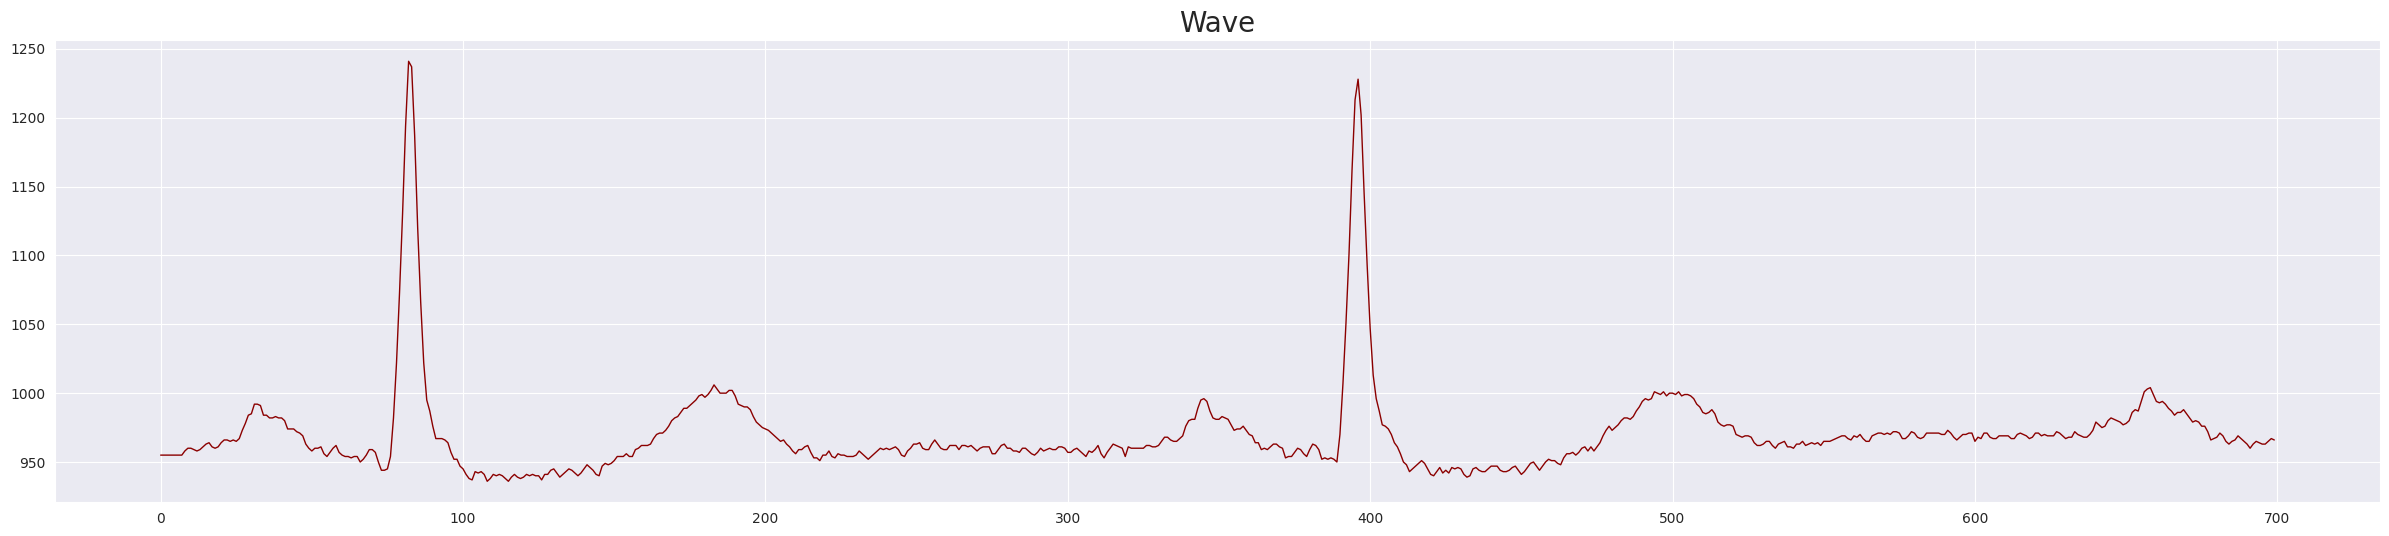

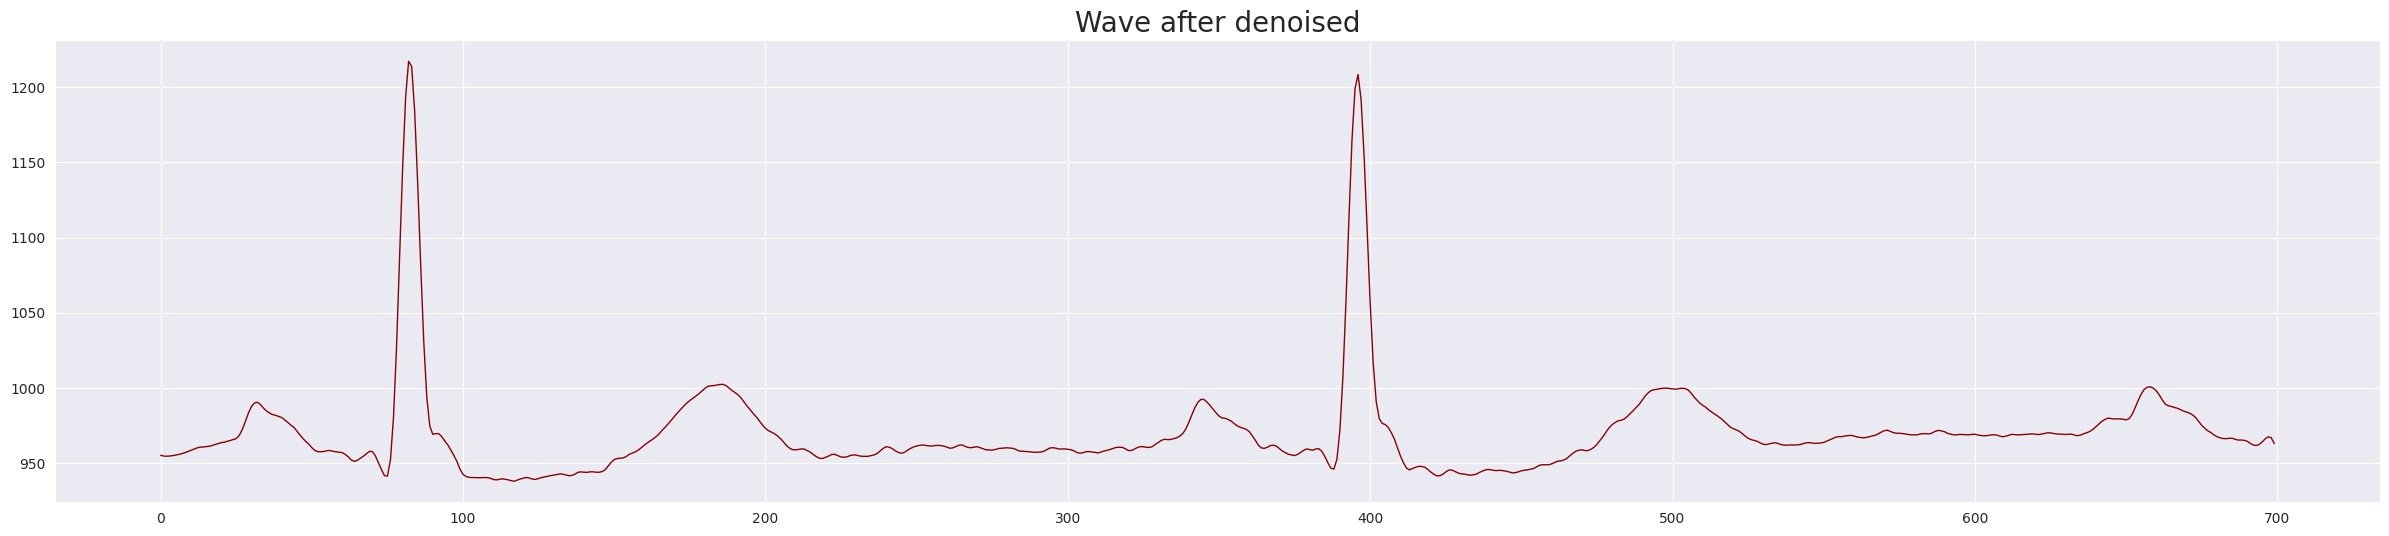

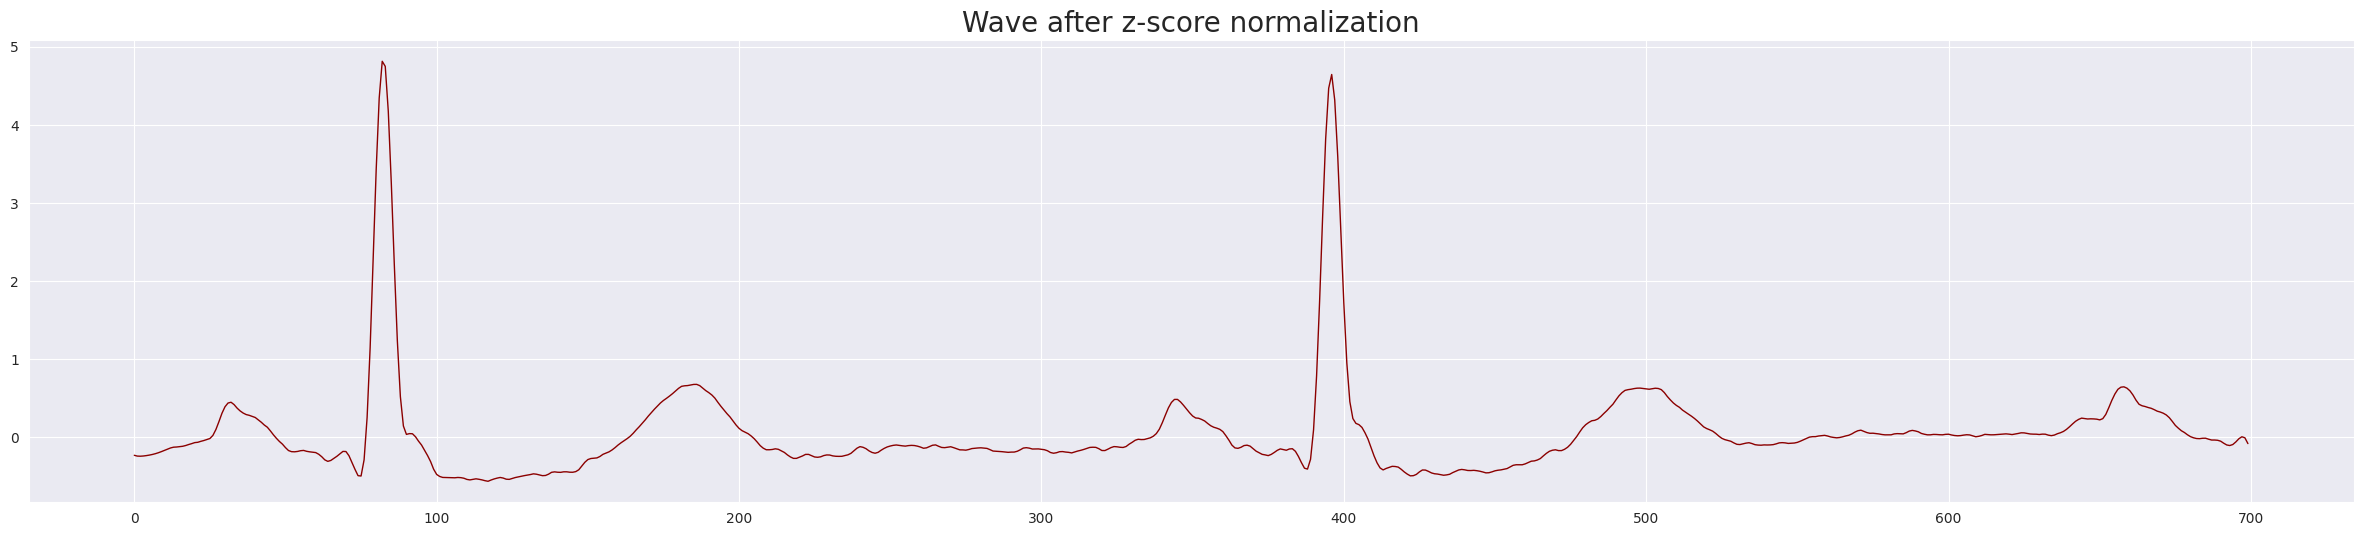

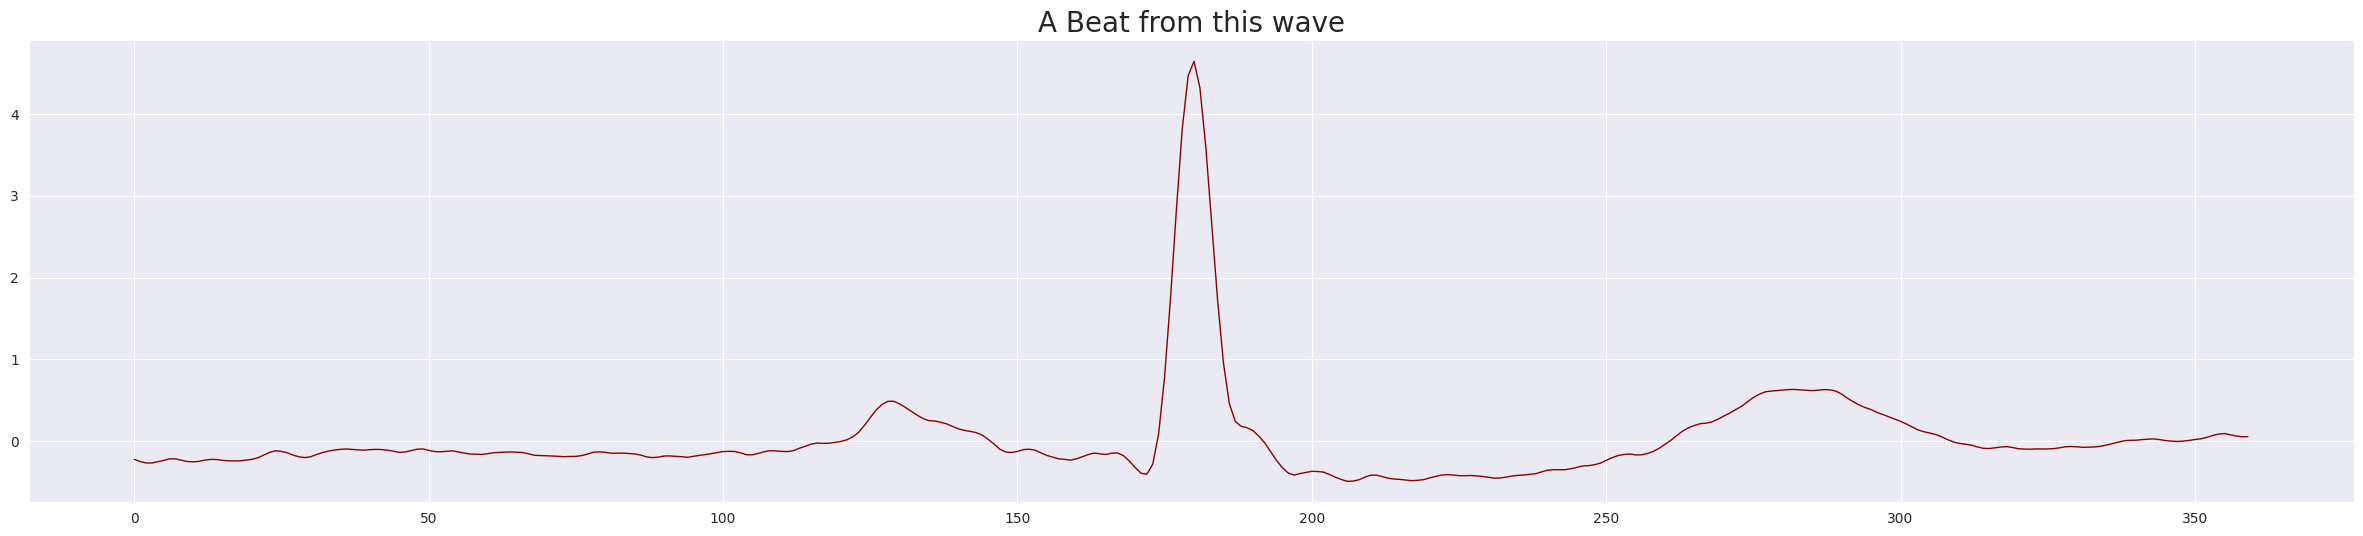

(100012, 360) (100012,)


In [ ]:
#Savitzky-Golay filter Method
from scipy.signal import savgol_filter

def sav_golay_filter(data):
    window_length = 21  # Window length of the filter
    poly_order = 6  # Polynomial order for fitting

    # Apply Savitzky-Golay filter
    smoothed_ecg = savgol_filter(data, window_length, poly_order)
    return smoothed_ecg

!pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style('darkgrid')

for r in range(0,len(records)):
    signals = []

    with open(records[r], 'rt') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') # read CSV file
        row_index = -1
        for row in spamreader:
            if(row_index >= 0):
                signals.insert(row_index, int(row[1]))
            row_index += 1

    # Plot an example to the signals
    if r is 1:
        # Plot each patient's signal
        plt.title("Wave", fontsize=20)
        plt.plot(signals[0:700], color='darkred')
        plt.show()

    signals = sav_golay_filter(signals)
    # Plot an example to the signals
    if r is 1:
        # Plot each patient's signal
        plt.title("Wave after denoised", fontsize=20)
        plt.plot(signals[0:700], color='darkred')
        plt.show()

    signals = stats.zscore(signals)
    # Plot an example to the signals
    if r is 1:
        # Plot each patient's signal
        plt.title("Wave after z-score normalization", fontsize=20)
        plt.plot(signals[0:700], color='darkred')
        plt.show()

    # Read anotations: R position and Arrhythmia class
    example_beat_printed = False
    with open(annotations[r], 'r') as fileID:
        data = fileID.readlines()
        beat = list()

        for d in range(1, len(data)): # 0 index is Chart Head
            splitted = data[d].split(' ')
            splitted = filter(None, splitted)
            next(splitted) # Time... Clipping
            pos = int(next(splitted)) # Sample ID
            arrhythmia_type = next(splitted) # Type
            if(arrhythmia_type in classes):
                arrhythmia_index = classes.index(arrhythmia_type)
#                 if count_classes[arrhythmia_index] > maximum_counting: # avoid overfitting
#                     pass
#                 else:
                count_classes[arrhythmia_index] += 1
                if(window_size <= pos and pos < (len(signals) - window_size)):
                    beat = signals[pos-window_size:pos+window_size]     # REPLACE WITH R-PEAK DETECTION
                    # Plot an example to a beat
                    if r is 1 and not example_beat_printed:
                        plt.title("A Beat from this wave", fontsize=20)
                        plt.plot(beat, color='darkred')
                        plt.show()
                        example_beat_printed = True

                    X.append(beat)
                    y.append(arrhythmia_index)

# data shape
print(np.shape(X), np.shape(y))

In [ ]:
for i in range(0,len(X)):
        X[i] = np.append(X[i], y[i])

print(np.shape(X))

(100012, 361)


0.0    75011
1.0     8071
2.0     7255
4.0     7129
3.0     2546
Name: 360, dtype: int64


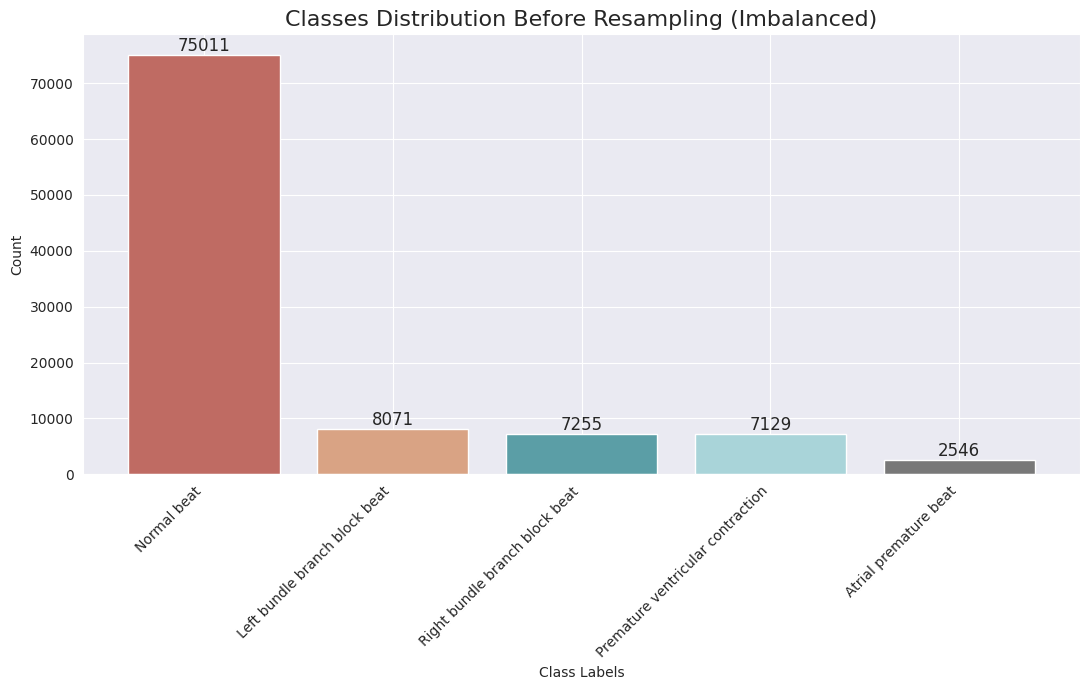

In [ ]:
X_train_df = pd.DataFrame(X)
per_class = X_train_df[X_train_df.shape[1]-1].value_counts()
print(per_class)

class_labels = ['Normal beat', 'Left bundle branch block beat', 'Right bundle branch block beat', 'Premature ventricular contraction', 'Atrial premature beat']
colors = ['#bf6b63', '#d9a384', '#5b9ea6', '#a9d4d9', '#787878']

plt.figure(figsize=(11, 7))
plt.bar(class_labels, per_class, color=colors)

# Add labels to the bars
for i, count in enumerate(per_class):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Classes Distribution Before Resampling (Imbalanced)', fontsize=16)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
df_1=X_train_df[X_train_df[X_train_df.shape[1]-1]==1]
df_2=X_train_df[X_train_df[X_train_df.shape[1]-1]==2]
df_3=X_train_df[X_train_df[X_train_df.shape[1]-1]==3]
df_4=X_train_df[X_train_df[X_train_df.shape[1]-1]==4]
# df_5=X_train_df[X_train_df[X_train_df.shape[1]-1]==5]
df_0=(X_train_df[X_train_df[X_train_df.shape[1]-1]==0]).sample(n=5000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=5000,random_state=122)
df_2_upsample=resample(df_2,replace=True,n_samples=5000,random_state=123)
df_3_upsample=resample(df_3,replace=True,n_samples=5000,random_state=124)
df_4_upsample=resample(df_4,replace=True,n_samples=5000,random_state=125)
# df_5_upsample=resample(df_5,replace=True,n_samples=5000,random_state=126)

# X_train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample,df_5_upsample])
X_train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

0.0    5000
1.0    5000
2.0    5000
3.0    5000
4.0    5000
Name: 360, dtype: int64


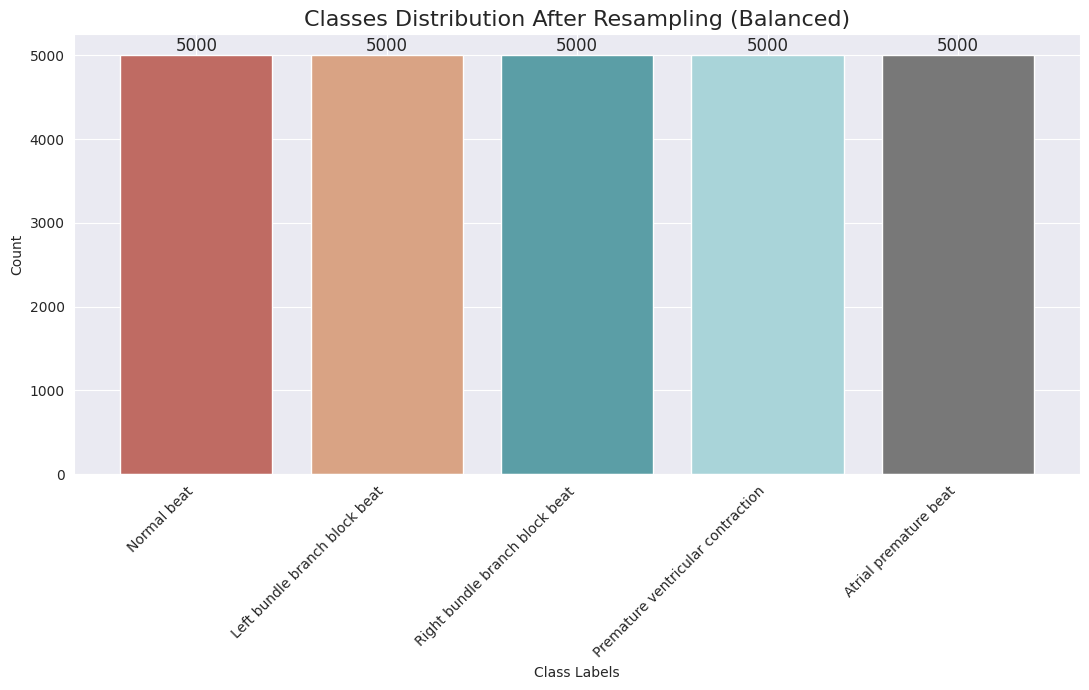

In [ ]:
per_class = X_train_df[X_train_df.shape[1]-1].value_counts()
print(per_class)

class_labels = ['Normal beat', 'Left bundle branch block beat', 'Right bundle branch block beat', 'Premature ventricular contraction', 'Atrial premature beat']
colors = ['#bf6b63', '#d9a384', '#5b9ea6', '#a9d4d9', '#787878']

plt.figure(figsize=(11, 7))
plt.bar(class_labels, per_class, color=colors)

# Add labels to the bars
for i, count in enumerate(per_class):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Classes Distribution After Resampling (Balanced)', fontsize=16)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
train, test = train_test_split(X_train_df, test_size=0.20)

print("X_train : ", np.shape(train))
print("X_test  : ", np.shape(test))

X_train :  (20000, 361)
X_test  :  (5000, 361)


In [ ]:
target_train=train[train.shape[1]-1]
target_test=test[test.shape[1]-1]
train_y=to_categorical(target_train)
test_y=to_categorical(target_test)
print(np.shape(train_y), np.shape(test_y))

(20000, 5) (5000, 5)


In [ ]:
train_x = train.iloc[:,:train.shape[1]-1].values
test_x = test.iloc[:,:test.shape[1]-1].values
train_x = train_x.reshape(len(train_x), train_x.shape[1],1)
test_x = test_x.reshape(len(test_x), test_x.shape[1],1)
print(np.shape(train_x), np.shape(test_x))

(20000, 360, 1) (5000, 360, 1)


In [ ]:
from keras.layers import LSTM

model = Sequential()

model.add(Conv1D(filters=16, kernel_size=13, padding='same', activation='relu', input_shape=(360, 1)))
model.add(AvgPool1D(pool_size=3, strides=2))

model.add(Conv1D(filters=32, kernel_size=15, padding='same', activation='relu'))
model.add(AvgPool1D(pool_size=3, strides=2))

model.add(Conv1D(filters=64, kernel_size=17, padding='same', activation='relu'))
model.add(AvgPool1D(pool_size=3, strides=2))

model.add(Conv1D(filters=128, kernel_size=19, padding='same', activation='relu'))
model.add(AvgPool1D(pool_size=3, strides=2))

model.add(Conv1D(filters=256, kernel_size=21, padding='same', activation='relu'))
model.add(AvgPool1D(pool_size=3, strides=2))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(35, kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001)))

model.add(Dense(5, kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001)))

model.add(Softmax())

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 360, 16)           224       
                                                                 
 average_pooling1d (Average  (None, 179, 16)           0         
 Pooling1D)                                                      
                                                                 
 conv1d_1 (Conv1D)           (None, 179, 32)           7712      
                                                                 
 average_pooling1d_1 (Avera  (None, 89, 32)            0         
 gePooling1D)                                                    
                                                                 
 conv1d_2 (Conv1D)           (None, 89, 64)            34880     
                                                                 
 average_pooling1d_2 (Avera  (None, 44, 64)            0

In [ ]:
class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs["val_accuracy"]
        if val_acc >= 99.50:
            self.model.stop_training = True

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:

history = model.fit(train_x, train_y, batch_size=512, epochs=50, verbose=1, validation_data=(test_x, test_y), callbacks=[callback])

NameError: ignored

In [ ]:
batch_sizes = [16, 32, 64]
epochs_list = [60, 80, 100]

for batch_size in batch_sizes:
    for epochs in epochs_list:

        # Train the model
        history = model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(test_x, test_y))

        # Record performance metrics, analyze results
        accuracy = history.history['accuracy'][-1]  # Get the last epoch accuracy
        validation_accuracy = history.history['val_accuracy'][-1]  # Validation accuracy

        # Print or log accuracy and other metrics for analysis
        print(f"Batch Size: {batch_size}, Epochs: {epochs}, Accuracy: {accuracy}, Validation Accuracy: {validation_accuracy}")


Batch Size: 16, Epochs: 60, Accuracy: 0.9955999851226807, Validation Accuracy: 0.9941999912261963
Batch Size: 16, Epochs: 80, Accuracy: 0.9987000226974487, Validation Accuracy: 0.9937999844551086
Batch Size: 16, Epochs: 100, Accuracy: 0.9986500144004822, Validation Accuracy: 0.9944000244140625
Batch Size: 32, Epochs: 60, Accuracy: 0.9994500279426575, Validation Accuracy: 0.9937999844551086
Batch Size: 32, Epochs: 80, Accuracy: 0.9991499781608582, Validation Accuracy: 0.9876000285148621
Batch Size: 32, Epochs: 100, Accuracy: 0.9978500008583069, Validation Accuracy: 0.9932000041007996
Batch Size: 64, Epochs: 60, Accuracy: 0.9983000159263611, Validation Accuracy: 0.9929999709129333
Batch Size: 64, Epochs: 80, Accuracy: 0.9998999834060669, Validation Accuracy: 0.9937999844551086
Batch Size: 64, Epochs: 100, Accuracy: 0.9987999796867371, Validation Accuracy: 0.9944000244140625


In [ ]:

model.save('/content/drive/MyDrive/Arrthymia-Detection_LDCNN.h5')

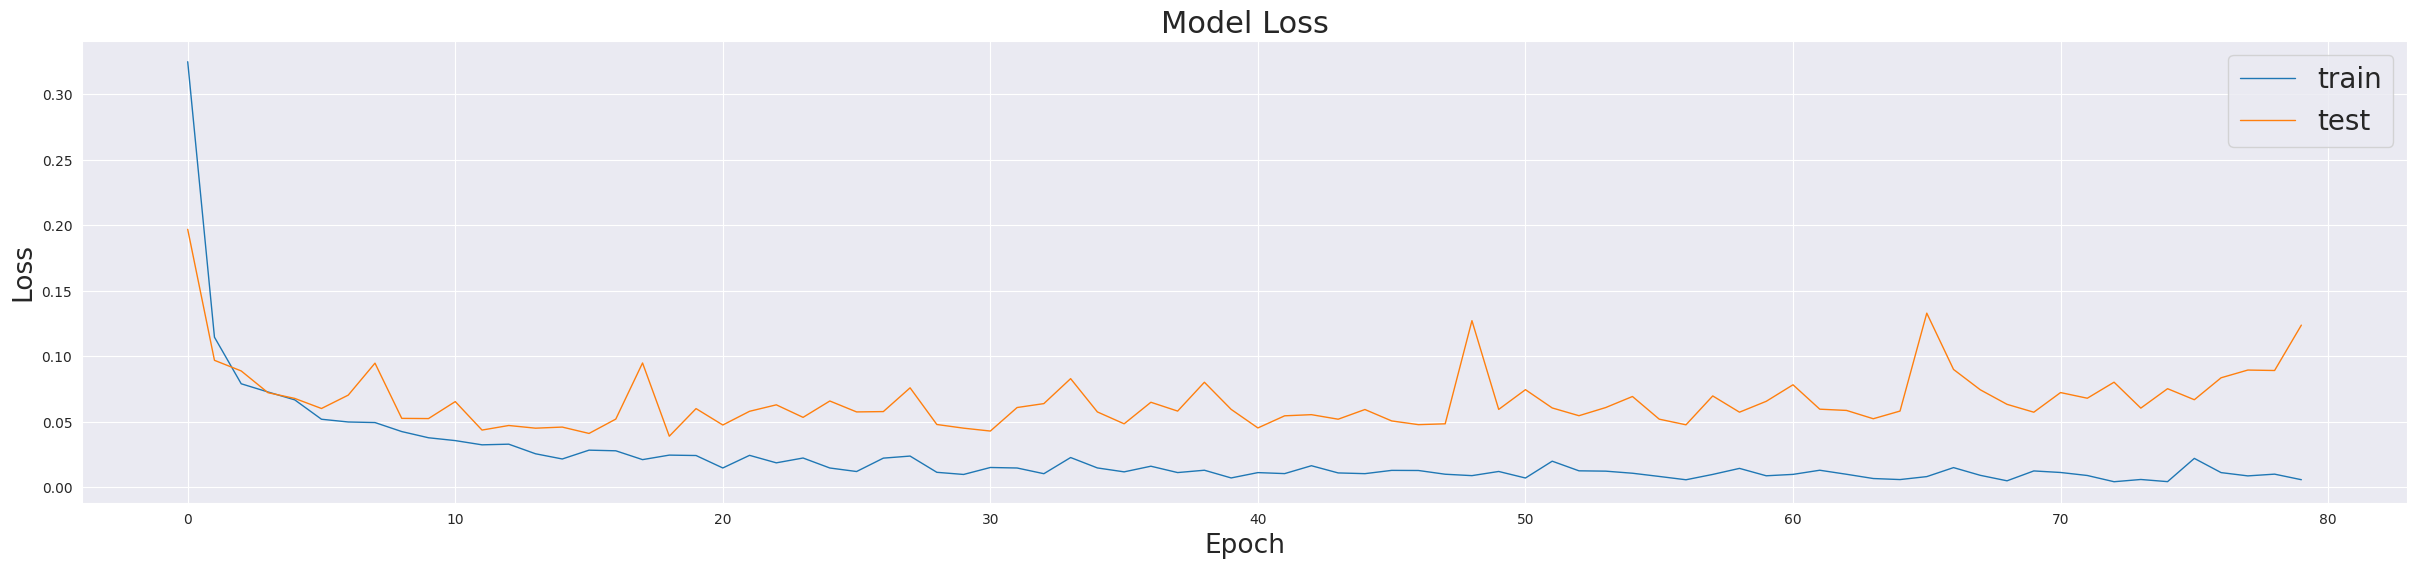

In [ ]:

sns.set_style('darkgrid')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize=22)
plt.ylabel('Loss', fontsize=19)
plt.xlabel('Epoch', fontsize=19)
plt.legend(['train', 'test'], prop = {'size' : 20}, loc='upper right')
plt.show()

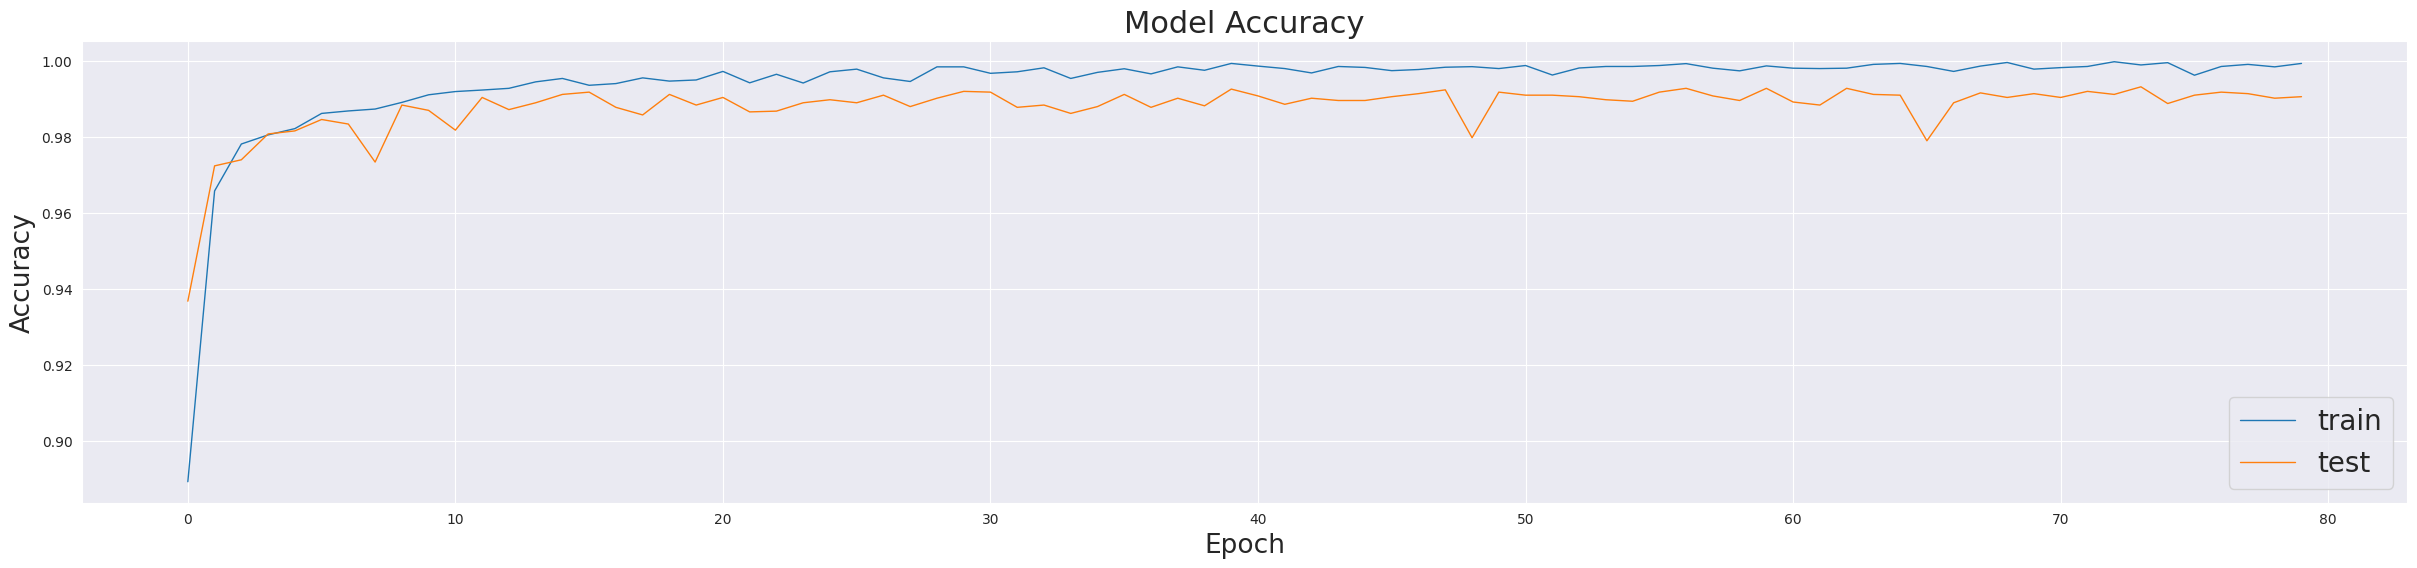

In [ ]:

sns.set_style('darkgrid')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=22)
plt.ylabel('Accuracy', fontsize=19)
plt.xlabel('Epoch', fontsize=19)
plt.legend(['train', 'test'], prop = {'size' : 20}, loc='lower right')
plt.show()

In [ ]:

score = model.evaluate(test_x, test_y)

print('Test Loss:', score[0])
print('Test accuracy:', score[1])


157/157 [==============================] - 1s 5ms/step - loss: 0.1449 - accuracy: 0.9904
Test Loss: 0.14492495357990265
Test accuracy: 0.9904000163078308


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

# Evaluate the model on the test set
score = model.evaluate(test_x, test_y)

# Predict the classes for the test set
y_pred = model.predict(test_x)
y_pred = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels

# Convert one-hot encoded true labels to class labels
y_true = np.argmax(test_y, axis=1)

# Calculate Precision, Recall, and F1 score
classification_rep = classification_report(y_true, y_pred, target_names=classes)
print(classification_rep)

157/157 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           N       0.98      0.98      0.98      1023
           L       1.00      1.00      1.00       991
           R       1.00      1.00      1.00      1019
           A       0.98      0.98      0.98       991
           V       0.99      0.99      0.99       976

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



In [ ]:

classification_rep = classification_report(y_true, y_pred, target_names=classes, output_dict=True)

# Extract the metrics for each class
metrics_dict = classification_rep['weighted avg']

# Calculate the average precision, recall, and F1-score
average_precision = metrics_dict['precision']
average_recall = metrics_dict['recall']
average_f1_score = metrics_dict['f1-score']

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1-score:", average_f1_score)

Average Precision: 0.9905958736276976
Average Recall: 0.9906
Average F1-score: 0.9905953119229037
